<a href="https://colab.research.google.com/github/cvs2010/udemyDeepLearning/blob/main/pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações inicias

In [1]:
import pandas as pd

In [2]:
 # Turn pandas dataframes into interactive tables that can be filtered, sorted, and explored dynamically
%load_ext google.colab.data_table

In [3]:
# Importing kaggle data via API
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/API´s/"

In [4]:
!wget https://github.com/ronaldolagepessoa/data_science/raw/master/dados/countries.csv

--2023-04-19 15:22:54--  https://github.com/ronaldolagepessoa/data_science/raw/master/dados/countries.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/countries.csv [following]
--2023-04-19 15:22:54--  https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38809 (38K) [text/plain]
Saving to: ‘countries.csv’

countries.csv       100%[===================>]  37.90K  --.-KB/s    in 0s      

2023-04-19 15:22:54 (91.1 MB/s) - ‘countries.csv’ saved [38809/38809]



# Manipulando DataFrames

In [5]:
# Criando um Dataframe (df = Base de Dados)
df = pd.read_csv('/content/countries.csv')

In [6]:
# 5 primeiros registros do Dataframe
df.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [7]:
# 5 últimos registros do Dataframe
df.tail()

,country,year,population
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563
1703,Zimbabwe,2007,12311143


In [8]:
# Informações dos registros do Dataframe, geralmente utilizado para
# ver se há valores nulos (null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [9]:
# Informações estatísticas do Dataframe
df.describe()

,year,population
count,1704.00000,1.704000e+03
mean,1979.50000,2.960121e+07
std,17.26533,1.061579e+08
min,1952.00000,6.001100e+04
25%,1965.75000,2.793664e+06
50%,1979.50000,7.023596e+06
75%,1993.25000,1.958522e+07
max,2007.00000,1.318683e+09


In [10]:
# Acessando colunas do Dataframe - duas formas
df['country']
df.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [11]:
# Resgatando os valores únicos de uma coluna DataFrame na forma de array
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [12]:
# Filtrando um atributo de uma coluna do Dataframe
df[df.country == 'Brazil']

,country,year,population
168,Brazil,1952,56602560
169,Brazil,1957,65551171
170,Brazil,1962,76039390
171,Brazil,1967,88049823
172,Brazil,1972,100840058
173,Brazil,1977,114313951
174,Brazil,1982,128962939
175,Brazil,1987,142938076
176,Brazil,1992,155975974
177,Brazil,1997,168546719


# Trabalhando com Plotagens

In [13]:
import matplotlib.pyplot as plt

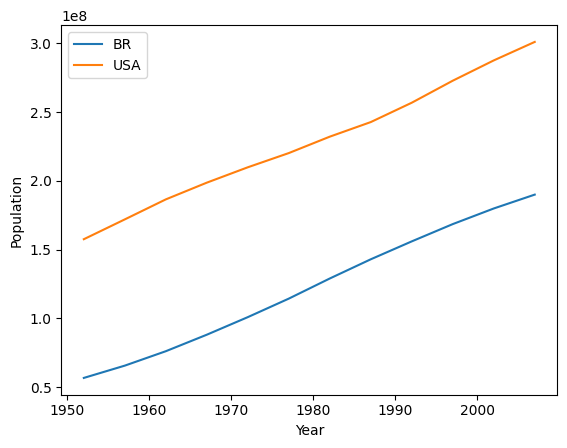

In [18]:
# Criando um gráfico da população do Brasil
brazil = df[df.country == 'Brazil'].copy()
usa = df[df.country == 'United States'].copy()

plt.plot(brazil.year, brazil.population, label='BR')
plt.plot(usa.year, usa.population, label='USA')
plt.legend()
plt.ylabel('Population')
plt.xlabel('Year')
plt.show()

Criando Colunas

In [24]:
#Selecionando a linha 0 [0,1,2...12] e coluna 2 [0,1,2]
brazil.iloc[0, 2]

56602560

In [23]:
# Criando uma coluna com a população relativa ao ano 1952 (population/primeira linha e última coluna)
brazil['population_rel'] = brazil.population / brazil.iloc[0, 2]
brazil

,country,year,population,population_rel
168,Brazil,1952,56602560,1.000000
169,Brazil,1957,65551171,1.158096
170,Brazil,1962,76039390,1.343391
171,Brazil,1967,88049823,1.555580
172,Brazil,1972,100840058,1.781546
173,Brazil,1977,114313951,2.019590
174,Brazil,1982,128962939,2.278394
175,Brazil,1987,142938076,2.525293
176,Brazil,1992,155975974,2.755635
177,Brazil,1997,168546719,2.977723
